# Data Exploration

Remember the quality of your inputs decide the quality of your output. 

Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods as shown below:


Numerical Features

Categorical Features

Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.


Missing Value Treatment

 
Why missing values treatment is required?

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.


Imputing missing values

Transforming numerical varaibles that seems to be categorical

Label econding categorical varaibles


Outliers
Explore outliers using scatter plot
Delete outliers



Clusters


Correlations
Correlation shows how features are correlated with target label


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#figsize(15, 5)
%load_ext autotime

In [2]:
dtypes = {'ip': np.uint32, 'app': np.uint16, 'device': np.uint8, 'os': np.uint8, 'channel': np.uint8, 'is_attributed': np.bool}
train_sample_df = pd.read_csv('raw_data/train_sample.csv', sep=',', dtype=dtypes, parse_dates=['click_time', 'attributed_time'])
train_sample_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint8
os                 100000 non-null uint8
channel            100000 non-null uint8
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null datetime64[ns]
is_attributed      100000 non-null bool
dtypes: bool(1), datetime64[ns](2), uint16(1), uint32(1), uint8(3)
memory usage: 2.5 MB


In [3]:
train_sample_df[:3]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,241,2017-11-07 09:30:38,NaT,False
1,105560,25,1,17,3,2017-11-07 13:40:27,NaT,False
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,False


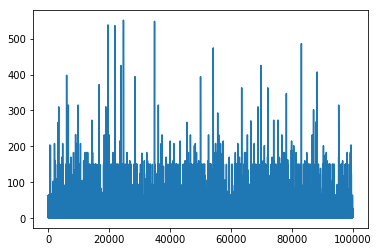

In [4]:
train_sample_df['app'].plot()

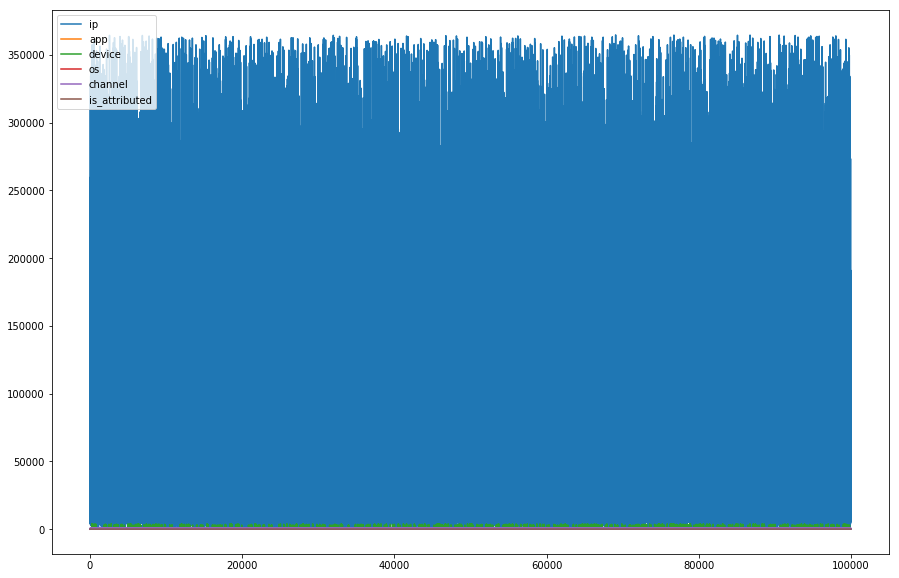

In [5]:
train_sample_df.plot(figsize=(15, 10))

In [25]:
train_sample_df['app'].unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261], dtype=int64)

In [26]:
train_sample_df['device'].unique()

array([   1,    2, 3866,    0, 3032, 3543,    7,   40,  385,   56, 3282,
        103,   16,   21,   30,    4,   59,   33,  211,   20,    5,  883,
        154,  607,  957,   37,  102,  124, 2429,   50,  116,   18,  579,
        188,   74,  291,   36, 1482,  347,  160,   25,  486,  516,   97,
        321,  196,  581,   53,  828,  114,  109,    6,  414,  351,   60,
        106, 3867, 1422,  210,  374,   76,  182,  129,   79,  362,  100,
       1728, 2120, 1318,  386,  558,  180,  167,  202,   17,  203, 1162,
        657,   78,    9, 3545, 1839,  420, 2980,  552,   67, 1080,   11,
       3331,  329,  596,  163,  549,   58,  268,  928,  220,   49, 1042,
        241], dtype=int64)

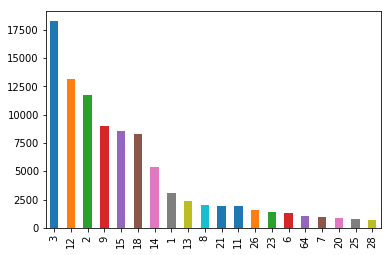

In [28]:
train_sample_df['app'].value_counts()[:20].plot(kind='bar');

In [5]:
train_sample_df.groupby(['device','os']).size()

device  os 
0       0        160
        21        48
        24       150
        29        32
        38        78
        50        30
        59        12
        67         1
        76        13
        95         5
        98         7
        99         1
        135        1
        236        3
1       1       1163
        2        345
        3       1533
        4        282
        5         57
        6       2436
        7        107
        8       2709
        9       1783
        10      2709
        11       652
        12      1079
        13     20405
        14      1287
        15      2317
        16      1627
               ...  
142     0          1
145     24         1
154     50         1
158     0          1
160     0          2
        21         1
163     0          1
164     0          1
        76         1
167     38         1
180     29         1
182     116        1
        199        1
188     29         1
189     59         1
192     29         1
1

In [7]:
train_sample_df['os'].unique()

array([ 13,  17,  19,   1,  25,  22,  20,   2,  90,  10,  18,  40,  15,
        27,  23,  53,  49,  37,  26,  41,   8,  11,   9,  14,  28,  47,
         3,   6,  97,   4,  31,  16,  30,  32,  12,  46,  98,  65,  55,
        29,  42,  39,  34,  95,  79,  35,  44,   7,   0, 236,  36,  99,
        43,  21,  64,  58,  50,  24,  66,  57, 109,  70,  68,  56, 108,
        76, 137,  48,   5,  38,  63, 100,  62,  96,  88,  73,  74, 138,
        45,  84,  52,  61, 172,  59,  81, 102,  77,  78,  60, 153,  80,
       118,  69,  85, 151, 178, 113, 192, 135, 198,  83, 112,  67, 132,
        71, 142, 117, 111, 168, 106, 110, 129, 127, 107, 152, 155, 199,
       133, 116,  92, 196,  87, 174, 207, 184, 114, 185, 193],
      dtype=uint64)

In [12]:
train_sample_df['ip'].unique().size

34857

In [3]:
dtypes = {'ip': np.uint32, 'app': np.uint16, 'device': np.uint8, 'os': np.uint8, 'channel': np.uint8, 'is_attributed': np.bool}
train_df = pd.read_csv('raw_data/train.csv', sep=',', dtype=dtypes, parse_dates=['click_time', 'attributed_time'])
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 uint32
app                uint16
device             uint8
os                 uint8
channel            uint8
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed      bool
dtypes: bool(1), datetime64[ns](2), uint16(1), uint32(1), uint8(3)
memory usage: 4.5 GB
time: 6min 24s


Feature Engineering




277396

In [5]:
print ('Unique \'ip\' count:',train_df.ip.unique().size)
print ('Unique \'app\' count:',train_df.app.unique().size)
print ('Unique \'device\' & \'os\' combinations count:',train_df.groupby(['device','os']).size().size)
print ('Unique \'channel\' count:',train_df.channel.unique().size)
print ('Total downloads count in training set:',train_df[train_df.is_attributed == 1].size)

Unique 'ip' count: 277396
Unique 'app' count: 706
Unique 'device' & 'os' combinations count: 2532
Unique 'channel' count: 160
Total downloads count in training set: 3654768
time: 41.4 s


In [9]:
(train_df.attributed_time-train_df.click_time).astype('timedelta64[h]').unique()[:1000]

array([nan, 16., 18.,  7.,  8.,  0., 12., 19., 11.,  1., 23.,  9., 14.,
       17., 10., 21.,  2., 20., 22., 15., 13.,  6.,  5.,  3.,  4.])

time: 9.17 s


Cross validation strategy

Models


Enassemble